In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load data
df = pd.read_csv(r"C:\Users\Daniel.Temesgen\Desktop\KIAM-Rsc\week5\Data\data.csv")
print(df.head)

<bound method NDFrame.head of               TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
0       SubscriptionId_887  CustomerId_4406          UGX          256   
1      SubscriptionId_3829  CustomerId_4406          UGX          2

## Overview of the Data
#Understand the structure, including rows, columns, and data types.

In [4]:
#Display Basic info
print("Data Info:")
print(df.info)
print("\nfirst 5 rows:")
print(df.head)
#number of columns and Rows
print(f"\nShape of dataset{df.shape}")

Data Info:
<bound method DataFrame.info of               TransactionId         BatchId       AccountId  \
0       TransactionId_76871   BatchId_36123  AccountId_3957   
1       TransactionId_73770   BatchId_15642  AccountId_4841   
2       TransactionId_26203   BatchId_53941  AccountId_4229   
3         TransactionId_380  BatchId_102363   AccountId_648   
4       TransactionId_28195   BatchId_38780  AccountId_4841   
...                     ...             ...             ...   
95657   TransactionId_89881   BatchId_96668  AccountId_4841   
95658   TransactionId_91597    BatchId_3503  AccountId_3439   
95659   TransactionId_82501  BatchId_118602  AccountId_4841   
95660  TransactionId_136354   BatchId_70924  AccountId_1346   
95661   TransactionId_35670   BatchId_29317  AccountId_4841   

            SubscriptionId       CustomerId CurrencyCode  CountryCode  \
0       SubscriptionId_887  CustomerId_4406          UGX          256   
1      SubscriptionId_3829  CustomerId_4406          U

## Summary Statistics
#Understand central tendency, dispersion, and distribution shape.

In [5]:
# Summary statistics for numerical columns
print(f"Summary Statistics(Numerical)")
print(df.describe())
# Summary for categorical columns
print(f"\nSummary Statistics(Categorical)")
print(df.describe(include=['object']))

Summary Statistics(Numerical)
       CountryCode        Amount         Value  PricingStrategy   FraudResult
count      95662.0  9.566200e+04  9.566200e+04     95662.000000  95662.000000
mean         256.0  6.717846e+03  9.900584e+03         2.255974      0.002018
std            0.0  1.233068e+05  1.231221e+05         0.732924      0.044872
min          256.0 -1.000000e+06  2.000000e+00         0.000000      0.000000
25%          256.0 -5.000000e+01  2.750000e+02         2.000000      0.000000
50%          256.0  1.000000e+03  1.000000e+03         2.000000      0.000000
75%          256.0  2.800000e+03  5.000000e+03         2.000000      0.000000
max          256.0  9.880000e+06  9.880000e+06         4.000000      1.000000

Summary Statistics(Categorical)
              TransactionId        BatchId       AccountId  \
count                 95662          95662           95662   
unique                95662          94809            3633   
top     TransactionId_76871  BatchId_67019  Accou

##Distribution of Numerical Features
#Visualize distributions to identify patterns, skewness, and outliers.

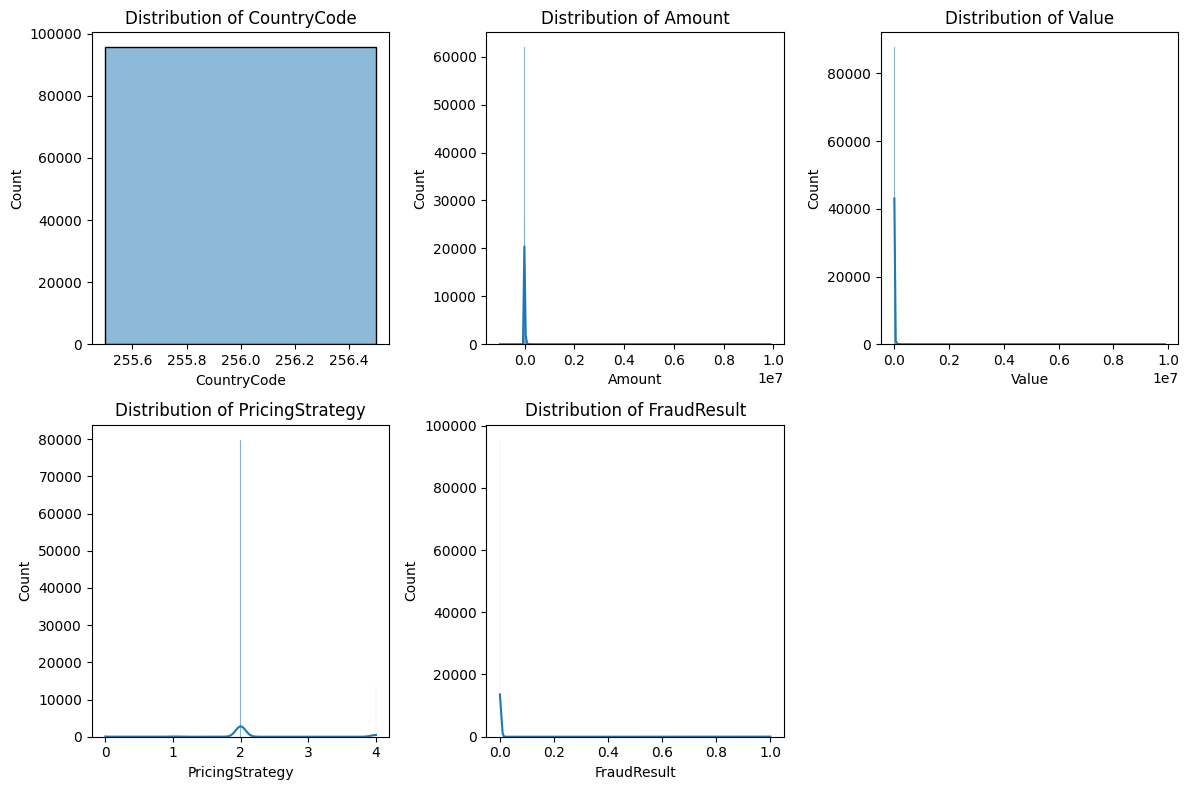

In [9]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) // 3) + 1, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Distribution of Categorical Features
# Analyze frequency and variability of categorical features.

Plotting CurrencyCode (1/4)...
Plotting ProviderId (2/4)...
Plotting ProductCategory (3/4)...
Plotting ChannelId (4/4)...


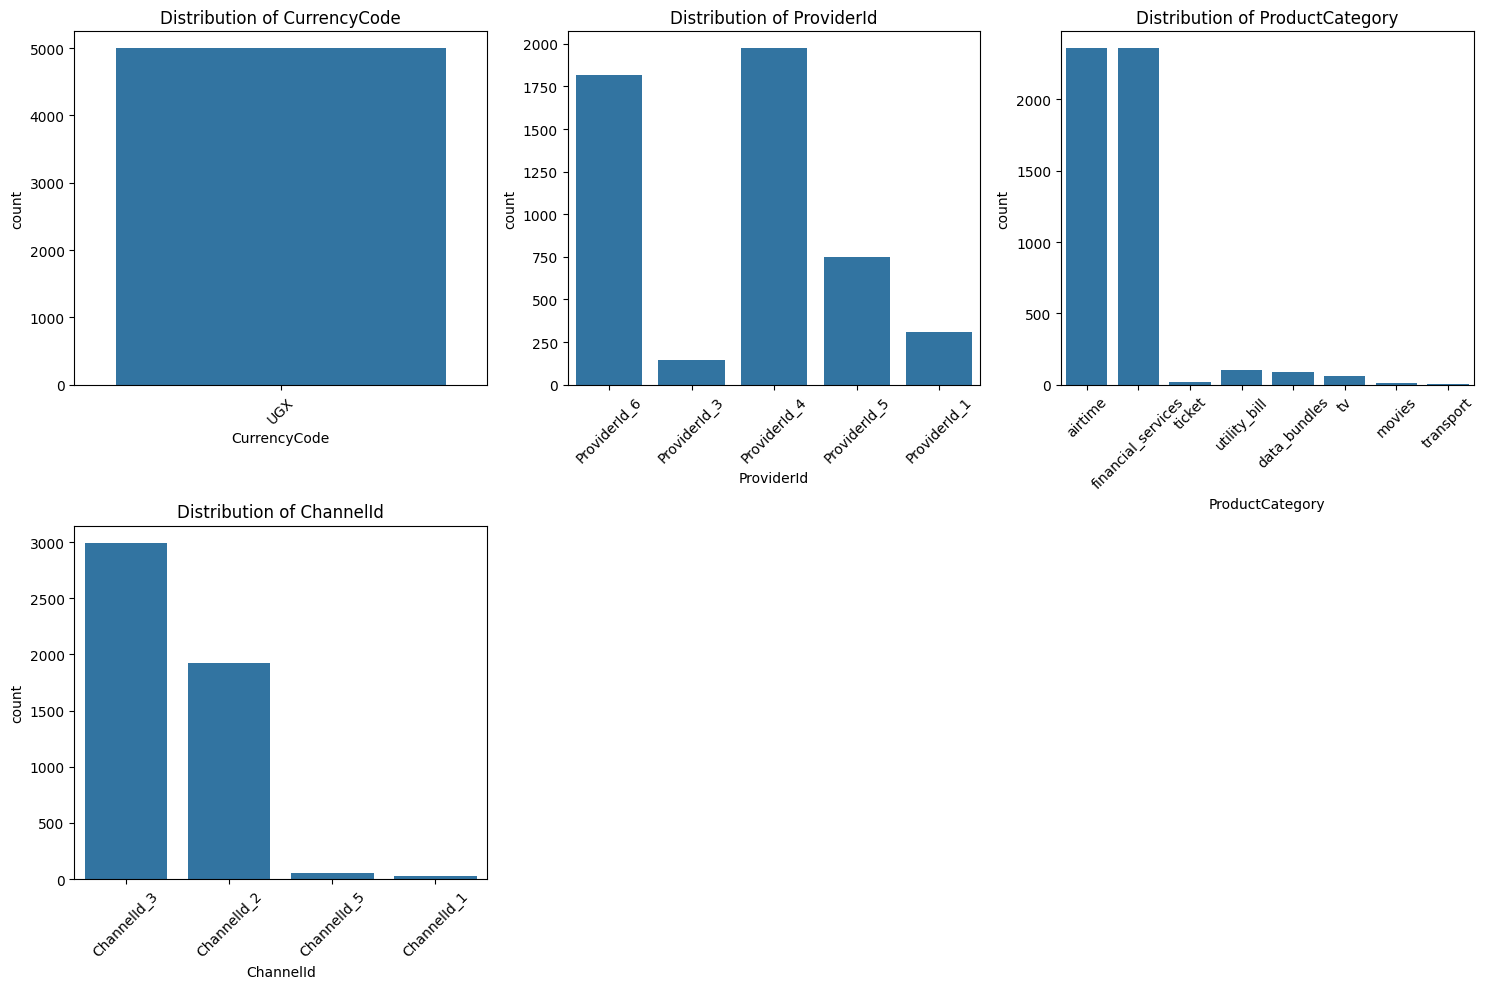


Value counts for TransactionId (Top 10 shown):
TransactionId
TransactionId_76871     1
TransactionId_73770     1
TransactionId_26203     1
TransactionId_380       1
TransactionId_28195     1
TransactionId_23223     1
TransactionId_118063    1
TransactionId_100640    1
TransactionId_51905     1
TransactionId_130161    1
Name: count, dtype: int64

Value counts for BatchId (Top 10 shown):
BatchId
BatchId_67019     28
BatchId_51870     16
BatchId_113893    14
BatchId_127204    12
BatchId_116835    10
BatchId_88001      9
BatchId_49408      7
BatchId_110084     7
BatchId_34879      6
BatchId_86880      6
Name: count, dtype: int64

Value counts for AccountId (Top 10 shown):
AccountId
AccountId_4841    30893
AccountId_4249     4457
AccountId_4840     1738
AccountId_3206     1105
AccountId_318      1070
AccountId_10        965
AccountId_3595      465
AccountId_751       411
AccountId_2648      359
AccountId_2314      356
Name: count, dtype: int64

Value counts for SubscriptionId (Top 10 shown

In [10]:
# Only plot columns with <= 20 unique categories
max_unique = 20
categorical_cols = [col for col in df.select_dtypes(include=['object']).columns if df[col].nunique() <= max_unique]

# Optional: use a sample for large datasets
sample_df = df.sample(5000) if len(df) > 5000 else df

# Plot
plt.figure(figsize=(15, 5 * ((len(categorical_cols) // 3) + 1)))
for i, col in enumerate(categorical_cols, 1):
    print(f"Plotting {col} ({i}/{len(categorical_cols)})...")
    plt.subplot((len(categorical_cols) // 3) + 1, 3, i)
    sns.countplot(data=sample_df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Value Counts
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nValue counts for {col} (Top 10 shown):")
    print(df[col].value_counts().head(10))
